In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

from src import VRAE
from src.utils import *

In [2]:
n_epochs = 100

hidden_size = 90
hidden_layer_depth = 1
latent_length = 20
batch_size = 8
learning_rate = 0.0005
dropout_rate = 0.0
optimizer = 'Adam'                              # options: ADAM, SGD
cuda = False                                    # options: True, False
print_every=30
clip = True                                     # options: True, False
max_grad_norm=5
loss = 'MSELoss'                                # options: SmoothL1Loss, MSELoss
block = 'LSTM'                                  # options: LSTM, GRU
saved_model_path = './saved_models'

In [3]:
directory_list = get_files_directory_list()
random_index = 85
random_path = directory_list[random_index]
X_train, X_val, y_train, y_val = get_data_from_directory(random_path)
X, y = get_data_from_directory(random_path, split=False)

In [4]:
num_classes = len(np.unique(y_train))
base = np.min(y_train)  # Check if data is 0-based
if base != 0:
    y_train -= base
y_val -= base

In [5]:
train_dataset = TensorDataset(torch.from_numpy(X_train))
test_dataset = TensorDataset(torch.from_numpy(X_val))

In [6]:
sequence_length = X_train.shape[1]

In [7]:
number_of_features = X_train.shape[2]

In [8]:
vrae = VRAE(sequence_length=sequence_length,
            number_of_features = number_of_features,
            hidden_size = hidden_size, 
            hidden_layer_depth = hidden_layer_depth,
            latent_length = latent_length,
            batch_size = batch_size,
            learning_rate = learning_rate,
            n_epochs = n_epochs,
            dropout_rate = dropout_rate,
            optimizer = optimizer, 
            cuda = cuda,
            print_every=print_every, 
            clip=clip, 
            max_grad_norm=max_grad_norm,
            loss = loss,
            block = block,
            dload = saved_model_path)

/home/samir/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning:

size_average and reduce args will be deprecated, please use reduction='sum' instead.



In [9]:
#vrae.fit(train_dataset)

In [10]:
#vrae.save('vrae.pth')
vrae.load(saved_model_path+'/vrae.pth')

In [11]:
z_run = vrae.transform(train_dataset)
z_run.shape

(144, 20)

SmoothSubspace


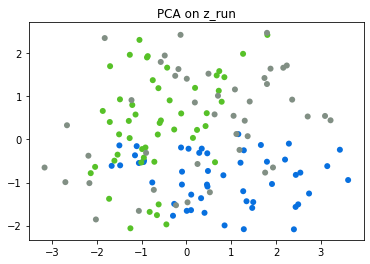

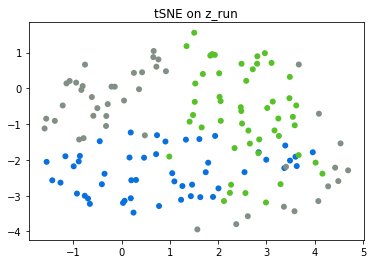

In [12]:
print(random_path)
plot_clustering(z_run, y_val, engine='matplotlib', download=False)